In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Transformasi data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Memuat dataset MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

# Membuat dataloader
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 24894293.87it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 71214399.66it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 35202900.35it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15718258.06it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



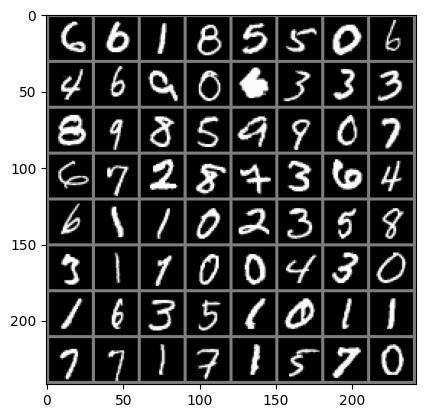

In [ ]:
# Fungsi untuk menampilkan gambar MNIST
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Menampilkan beberapa sampel gambar
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 128
num_classes = 10
model = SimpleNN(input_size, hidden_size, num_classes)

In [ ]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
    total_loss = 0
    for images, labels in train_loader:
        images = images.view(-1, 28 * 28)  # Flatten the images
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

Epoch 1, Loss: 0.3741424079261609
Epoch 2, Loss: 0.18828829357833432
Epoch 3, Loss: 0.13685379536556347
Epoch 4, Loss: 0.10858514028857512
Epoch 5, Loss: 0.0942709825879364


In [ ]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28 * 28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Akurasi pada gambar uji: {:.2f}%'.format(100 * correct / total))

Akurasi pada gambar uji: 96.82%


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fungsi untuk mendapatkan prediksi dari model
def get_all_predictions(model, data_loader):
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.view(-1, 28 * 28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted)
            all_labels.extend(labels)
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    return all_preds, all_labels

# Mendapatkan prediksi dari model pada data uji
predictions, true_labels = get_all_predictions(model, test_loader)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predictions)
print('Akurasi: {:.2f}%'.format(accuracy * 100))

# Membuat matriks kebingungan
conf_matrix = confusion_matrix(true_labels, predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Menghitung F1 Score, presisi, dan recall
report = classification_report(true_labels, predictions, target_names=[str(i) for i in range(10)])
print('Laporan Klasifikasi:')
print(report)

Akurasi: 96.82%
Confusion Matrix:
[[ 967    0    0    2    0    5    3    1    1    1]
 [   0 1123    3    2    0    1    2    1    3    0]
 [   4    9  963   24    4    1    6    9   12    0]
 [   0    0    0 1000    0    2    0    4    3    1]
 [   0    1    2    0  949    0    7    2    4   17]
 [   4    0    0   20    2  849    7    2    4    4]
 [   5    3    0    1    1    3  937    2    6    0]
 [   1   10    4    7    1    1    0  985    3   16]
 [   3    1    1   12    4    4    2    3  944    0]
 [   3    7    0   15   10    1    1    4    3  965]]
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.99      0.93      0.96      1032
           3       0.92      0.99      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.98  